In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [2]:
def prony(t, F, m):
    #  Input  : real arrays t, F of the same size (ti, Fi)
    #         : integer m - the number of modes in the exponential fit
    #  Output : arrays a and b such that F(t) ~ sum ai exp(bi*t)"""

	# Solve LLS problem in step 1
	# Amat is (N-m)*m and bmat is N-m*1
	N    = len(t)
	Amat = np.zeros((N-m, m))
	bmat = F[m:N]

	for jcol in range(m):
		Amat[:, jcol] = F[m-jcol-1:N-1-jcol]
		
	sol = np.linalg.lstsq(Amat, bmat)
	d = sol[0]

	# Solve the roots of the polynomial in step 2
	# first, form the polynomial coefficients
	c = np.zeros(m+1)
	c[m] = 1.
	for i in range(1,m+1):
		c[m-i] = -d[i-1]

	u = poly.polyroots(c)
	b_est = np.log(u)/(t[1] - t[0])

	# Set up LLS problem to find the "a"s in step 3
	Amat = np.zeros((N, m))
	bmat = F

	for irow in range(N):
		Amat[irow, :] = u**irow
		
	sol = np.linalg.lstsq(Amat, bmat)
	a_est = sol[0]

	return a_est, -b_est

In [3]:
# Number of decaying exponential terms to fit
nmodes = 10

# Power-law with exponent alf
alf = -0.8


t_data = np.linspace(0.01, 10, 100)
data = np.power(t_data, alf)


# Fit the Prony model to your data
c, lam = prony(t_data, data, nmodes)

print(c)
print(lam)

[23.59316751  5.08647117  3.26011498  2.39510548  1.8090488   1.36200704
  0.98719135  0.67607347  0.42544437  0.21609289]
[6.15183059e+01 2.72717147e+01 1.64966895e+01 1.02736906e+01
 6.25944293e+00 3.61156269e+00 1.90492002e+00 8.69226382e-01
 3.01077294e-01 4.53401444e-02]


/tmp/ipykernel_16424/855062173.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)
/tmp/ipykernel_16424/855062173.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)


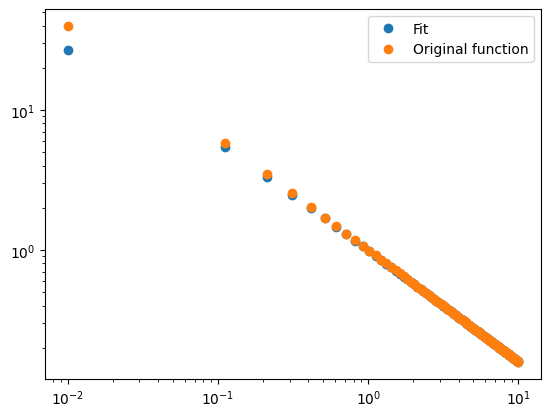

In [4]:
K_v = []
for time in t_data:
    K = 0.0
    for ck, lamk in zip(c, lam):
        K += ck * np.exp(-lamk*time)
    
    K_v.append(K)
	
plt.figure()
plt.loglog(t_data, K_v, 'o', label='Fit')
plt.loglog(t_data, data, 'o', label='Original function')
plt.legend()
plt.show()

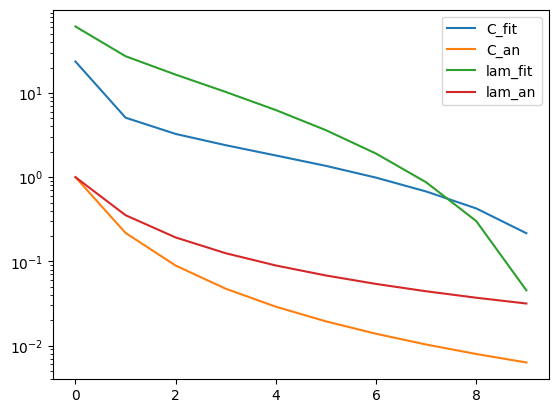

In [5]:
c_an = []
lam_an = []

a = -alf
b = 1.5

for k in range(1,nmodes+1):
    #print(1+a*b, b)
    #print(1/((k)**(1+a*b)), 1/((k)**b))
    c_an.append(1/((k)**(1+a*b)))
    lam_an.append(1/((k)**b))


plt.figure()
plt.plot(np.arange(nmodes), c, label='C_fit')
plt.plot(np.arange(nmodes), c_an, label='C_an')

plt.plot(np.arange(nmodes), lam, label='lam_fit')
plt.plot(np.arange(nmodes), lam_an, label='lam_an')
plt.yscale('log')
plt.legend()
plt.show()

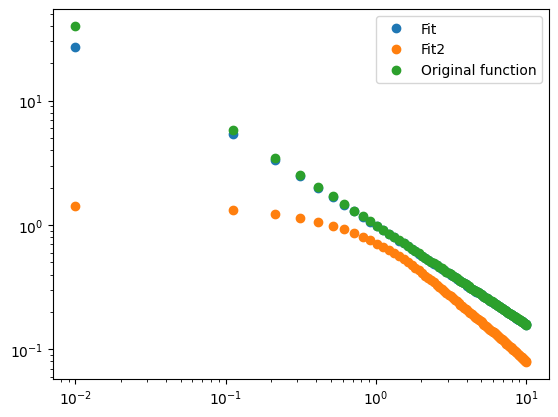

In [6]:
K_v2 = []
for time in t_data:
    K = 0.0
    for ck, lamk in zip(c_an, lam_an):
        K += ck * np.exp(-lamk*time)
    
    K_v2.append(K)
	
plt.figure()
plt.loglog(t_data, K_v, 'o', label='Fit')
plt.loglog(t_data, K_v2, 'o', label='Fit2')
plt.loglog(t_data, data, 'o', label='Original function')
plt.legend()
plt.show()